In [2]:
import pandas as pd
import numpy as np

## 네이버 책 가격 회귀 분석

In [3]:
import urllib.request
import json
import datetime

client_id = "fP155_fIbiINbREJMUiR"
client_secret = "hCFcz0YTay"


# url 만드는 함수
def get_search_url(api_node, search_text, start_num, disp_num):
    """
    api_node : 쇼핑, 블로그, 카페 등 어디에서 검색할 것인지
    search_text : 검색어
    start_num : 검색 시작 위치
    disp_num : 한 번에 표시할 검색 결과 개수
    """
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

# 페이지 정보 얻어오는 함수
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

# 제목의 tag를 제거하는 함수
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

# 한 페이지의 내용을 pandas로 반환해주는 함수
def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    price = [each["discount"] for each in json_data["items"]]
    publisher = [each["publisher"] for each in json_data["items"]]
    isbn = [each["isbn"].split() for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "title" : title,
        "price" : price,
        "isbn" : isbn,
        "link" : link,
        "publisher" : publisher
                
    }, columns = ["title", "price", "isbn", "link", "publisher"])
    
    return result_pd

In [4]:
# 테스트
url = get_search_url('book', '파이썬', 10,3)
json_result = get_result_onpage(url)
pd_result = get_fields(json_result)
pd_result

[2023-10-05 14:27:46.451531] Url Request Success


,title,price,isbn,link,publisher
0,혼자 공부하는 데이터 분석 with 파이썬 (1:1 과외하듯 배우는 데이터 분석 자습서),23400,[9791169210287],https://search.shopping.naver.com/book/catalog...,한빛미디어
1,코딩은 처음이라 with 파이썬 (VS Code로 시작하는 파이썬),17280,[9788931467994],https://search.shopping.naver.com/book/catalog...,영진닷컴
2,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),34200,[9791189909178],https://search.shopping.naver.com/book/catalog...,책만


In [8]:
pd_result['link'][0]

'https://search.shopping.naver.com/book/catalog/32436442882'

In [5]:
# API를 이용한 1000개의 데이터 수집
result_book = []

for n in range(1, 1000, 100):
    url = get_search_url('book', '파이썬', n,100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)

    result_book.append(pd_result)

result_book = pd.concat(result_book)

[2023-10-05 14:27:47.158426] Url Request Success
[2023-10-05 14:27:47.600454] Url Request Success
[2023-10-05 14:27:48.102828] Url Request Success
[2023-10-05 14:27:48.560797] Url Request Success
[2023-10-05 14:27:49.135768] Url Request Success
[2023-10-05 14:27:49.618559] Url Request Success
[2023-10-05 14:27:50.273814] Url Request Success
[2023-10-05 14:27:50.975023] Url Request Success
[2023-10-05 14:27:51.816846] Url Request Success
[2023-10-05 14:27:52.396264] Url Request Success


In [6]:
# 인덱스 정리
result_book.reset_index(drop = True, inplace = True)
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      928 non-null    object
 1   price      928 non-null    object
 2   isbn       928 non-null    object
 3   link       928 non-null    object
 4   publisher  928 non-null    object
dtypes: object(5)
memory usage: 36.4+ KB


In [7]:
# 가격 데이터형 정리

result_book['price'] = result_book['price'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      928 non-null    object 
 1   price      928 non-null    float64
 2   isbn       928 non-null    object 
 3   link       928 non-null    object 
 4   publisher  928 non-null    object 
dtypes: float64(1), object(4)
memory usage: 36.4+ KB


In [9]:
# 한 페이지에 대한 테스트
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = 'https://search.shopping.naver.com/book/catalog/32436442882'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><title>Pandas Cookbook : 네이버 도서</title><link href="https://ssl.pstatic.net/shoppingsearch/static/book-catalog/book-catalog-230921-112747/img/favicon.ico" rel="shortcut icon"/><link href="https://ssl.pstatic.net/shoppingsearch/static/book-catalog/book-catalog-230921-112747/img/favicon_180.png" rel="apple-touch-icon"/><meta content="Pandas Cookbook : 네이버 도서" property="og:title"/><meta content="네이버 도서 상세정보를 제공합니다." property="og:description"/><meta content="https://shopping-phinf.pstatic.net/main_3243644/32436442882.20220527024433.jpg" property="og:image"/><meta content="https://search.shopping.naver.com/book/catalog/32436442882" property="og:url"/><meta content="10" name="next-head-count"/><link href="https://

책의 쪽수 정보도 페이지에서 긁어와보자.

In [11]:
soup.find_all(class_ = 'bookBasicInfo_spec__qmQ_N')

[<span class="bookBasicInfo_spec__qmQ_N">620<!-- -->쪽</span>]

In [12]:
soup.find_all(class_ = 'bookBasicInfo_spec__qmQ_N')[0].get_text()

'620쪽'

In [20]:
import re

tmp = soup.find_all(class_ = 'bookBasicInfo_spec__qmQ_N')[0].get_text()
result = re.search(r'\d+', tmp) # 숫자 정보만 추출
result.group() 

'620'

In [21]:
# 페이지 정보를 얻기 위한 함수

def get_page_num(soup):
    tmp = soup.find_all(class_ = 'bookBasicInfo_spec__qmQ_N')[0].get_text()

    # 페이지가 동작하지 않거나, 페이지 정보가 없는 경우가 생길 수 있으므로 예외 처리를 진행함
    try : 
        result = re.search(r'\d+', tmp) # 숫자 정보만 추출
        return result.group() 
    except:
        print("====> Error in get_page_num")
        return np.nan
    
get_page_num(soup)

'620'

전체 페이지에 대한 페이지 정보를 얻어와보자.

In [22]:
import time

page_num_col = [] # 페이지 데이터가 담길 변수

for url in result_book['link']:
    print(url)
    print(time.time())

    try:
        page_num = get_page_num(BeautifulSoup(urlopen(url), 'html.parser'))
        page_num_col.append(page_num)
    # urlopen이 되지 않은 경우를 대비하여 예외 처리 실행
    except:
        print("===> Error in urlopen")
        page_num_col.append(np.nan)

    print(len(page_num_col))
    time.sleep(0.5)

result_book['page_num'] = page_num_col

https://search.shopping.naver.com/book/catalog/32463987904
1696484913.1699588
1
https://search.shopping.naver.com/book/catalog/39969434625
1696484914.526038
2
https://search.shopping.naver.com/book/catalog/36925491630
1696484916.0234954
3
https://search.shopping.naver.com/book/catalog/34233217628
1696484920.3109972
4
https://search.shopping.naver.com/book/catalog/42173058623
1696484922.540563
5
https://search.shopping.naver.com/book/catalog/40354085633
1696484924.2246866
6
https://search.shopping.naver.com/book/catalog/36019497623
1696484925.7609994
7
https://search.shopping.naver.com/book/catalog/32507605957
1696484928.4479225
8
https://search.shopping.naver.com/book/catalog/42790783619
1696484933.0583854
9
https://search.shopping.naver.com/book/catalog/36555425618
1696484935.3377118
10
https://search.shopping.naver.com/book/catalog/39049935621
1696484936.9588459
11
https://search.shopping.naver.com/book/catalog/32456486633
1696484938.5246491
12
https://search.shopping.naver.com/book/

In [23]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      928 non-null    object 
 1   price      928 non-null    float64
 2   isbn       928 non-null    object 
 3   link       928 non-null    object 
 4   publisher  928 non-null    object 
 5   page_num   921 non-null    object 
dtypes: float64(1), object(5)
memory usage: 43.6+ KB


In [24]:
# 데이터 형 변환
result_book['page_num'] = result_book['page_num'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      928 non-null    object 
 1   price      928 non-null    float64
 2   isbn       928 non-null    object 
 3   link       928 non-null    object 
 4   publisher  928 non-null    object 
 5   page_num   921 non-null    float64
dtypes: float64(2), object(4)
memory usage: 43.6+ KB


In [26]:
for idx, row in result_book.iterrows():
    if np.isnan(row['page_num']):
        print(row['link'])

https://search.shopping.naver.com/book/catalog/32492583618
https://search.shopping.naver.com/book/catalog/32444932070
https://search.shopping.naver.com/book/catalog/42346984619
https://search.shopping.naver.com/book/catalog/32497231009
https://search.shopping.naver.com/book/catalog/32506228826
https://search.shopping.naver.com/book/catalog/32496154642
https://search.shopping.naver.com/book/catalog/32438227707


In [25]:
# 혹시 모르니 nan으로 입력된 데이터를 한 번 더 돌려보자.

for idx, row in result_book.iterrows():
    if np.isnan(row['page_num']):
        print("Start fix..")
        print(row['link'])
        page_num = get_page_num(BeautifulSoup(urlopen(row['link']), 'html.parser'))
        result_book.loc[idx, 'page_num'] = page_num
        time.sleep(0.5)

Start fix..
https://search.shopping.naver.com/book/catalog/32492583618


IndexError: list index out of range

nan이 출력된 페이지를 확인해보니 페이지 정보 데이터가 없었다. 그래서 해당 값이 없어서 indexerror가 뜬 것이다. 에러 없이 예외처리가 잘 동작되기 위해서는 아래와 같이 코드를 바꿔줘야할 것 같다.

In [28]:
def get_page_num(soup):
    tmp = soup.find_all(class_='bookBasicInfo_spec__qmQ_N')
    
    # 페이지 정보가 있는 경우
    if len(tmp) > 0:
        try:
            result = re.search(r'\d+', tmp[0].get_text()) # 숫자 정보만 추출
            return result.group()
        except:
            print("====> Error in get_page_num")
            return np.nan
    # 페이지 정보가 없는 경우
    else:
        print("====> 'bookBasicInfo_spec__qmQ_N' class not found")
        return np.nan
    

for idx, row in result_book.iterrows():
    if np.isnan(row['page_num']):
        print("Start fix..")
        print(row['link'])
        page_num = get_page_num(BeautifulSoup(urlopen(row['link']), 'html.parser'))
        result_book.loc[idx, 'page_num'] = page_num
        time.sleep(0.5)

Start fix..
https://search.shopping.naver.com/book/catalog/32492583618
====> 'bookBasicInfo_spec__qmQ_N' class not found
Start fix..
https://search.shopping.naver.com/book/catalog/32444932070
====> 'bookBasicInfo_spec__qmQ_N' class not found
Start fix..
https://search.shopping.naver.com/book/catalog/42346984619
====> 'bookBasicInfo_spec__qmQ_N' class not found
Start fix..
https://search.shopping.naver.com/book/catalog/32497231009
====> 'bookBasicInfo_spec__qmQ_N' class not found
Start fix..
https://search.shopping.naver.com/book/catalog/32506228826
====> 'bookBasicInfo_spec__qmQ_N' class not found
Start fix..
https://search.shopping.naver.com/book/catalog/32496154642
====> 'bookBasicInfo_spec__qmQ_N' class not found
Start fix..
https://search.shopping.naver.com/book/catalog/32438227707
====> 'bookBasicInfo_spec__qmQ_N' class not found


In [29]:
# 다시 시도했지만 입력이 안된 책 정보들은 삭제
result_book = result_book[result_book['page_num'].notnull()]
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 927
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      921 non-null    object 
 1   price      921 non-null    float64
 2   isbn       921 non-null    object 
 3   link       921 non-null    object 
 4   publisher  921 non-null    object 
 5   page_num   921 non-null    float64
dtypes: float64(2), object(4)
memory usage: 50.4+ KB


In [30]:
# 엑셀로 정리
writer = pd.ExcelWriter("./data/python_books.xlsx" , engine = 'xlsxwriter')
result_book.to_excel(writer, sheet_name ='Sheet1')

workbook = writer.book
workbook = writer.sheets['Sheet1']
workbook.set_column("A:A", 5)
workbook.set_column("B:B", 60)
workbook.set_column("C:C", 10)
workbook.set_column("D:D", 15)
workbook.set_column("E:E", 10)
workbook.set_column("F:F", 50)

writer.save()

C:\Users\nabi4\AppData\Local\Temp\ipykernel_7828\937227135.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


엑셀로 저장된 데이터를 다시 살펴보자.

In [31]:
raw_data = pd.read_excel('./data/python_books.xlsx', index_col = 0)
raw_data.head()

,title,price,isbn,link,publisher,page_num
0,모두의 파이썬 (20일 만에 배우는 프로그래밍 기초),10370,['9791160505856'],https://search.shopping.naver.com/book/catalog...,길벗,200
1,빅데이터분석기사 실기 한권완성 파이썬(Python)(2023) (작업형 제3유형 완...,25920,['9791163861997'],https://search.shopping.naver.com/book/catalog...,예문에듀,408
2,파이썬의 정석,26820,['9791140702671'],https://search.shopping.naver.com/book/catalog...,길벗캠퍼스,552
3,디딤돌 파이썬 (구조적 프로그래밍으로 설명한 파이썬 기초),26100,['9791192373058'],https://search.shopping.naver.com/book/catalog...,인피니티북스,548
4,"코딩 뇌를 깨우는 파이썬 (문제 해결 능력을 키우는 컴퓨팅 사고부터 알고리즘, 데이...",31500,['9791169211376'],https://search.shopping.naver.com/book/catalog...,한빛미디어,616


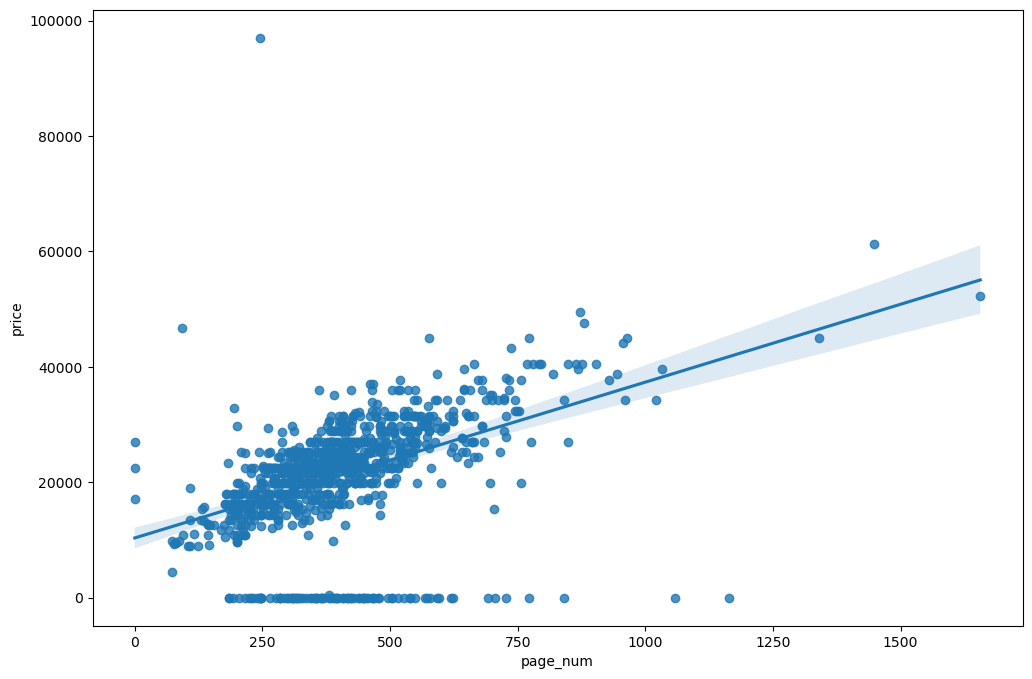

In [32]:
# 우리의 목적은 책의 가격을 예측하는 것이므로 한번 페이지 정보와 가격 사이의 회귀 그래프를 봐보자.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.regplot(x = 'page_num', y = 'price', data = raw_data)
plt.show()

In [33]:
# 출판사별 정보는 어떻게 분포되어있을까
raw_data['publisher'].value_counts()

에이콘출판          105
한빛미디어           84
위키북스            60
비제이퍼블릭          44
길벗              43
              ... 
도수서원             1
상상아카데미           1
예솔               1
시대고시기획 시대교육      1
이한미디어            1
Name: publisher, Length: 169, dtype: int64

In [34]:
len(raw_data['publisher'].unique()) # 출판사 개수도 많아보인다 

169

In [35]:
# matplotlib 한글 대응
from matplotlib import rc
rc("font", family = "Malgun Gothic")

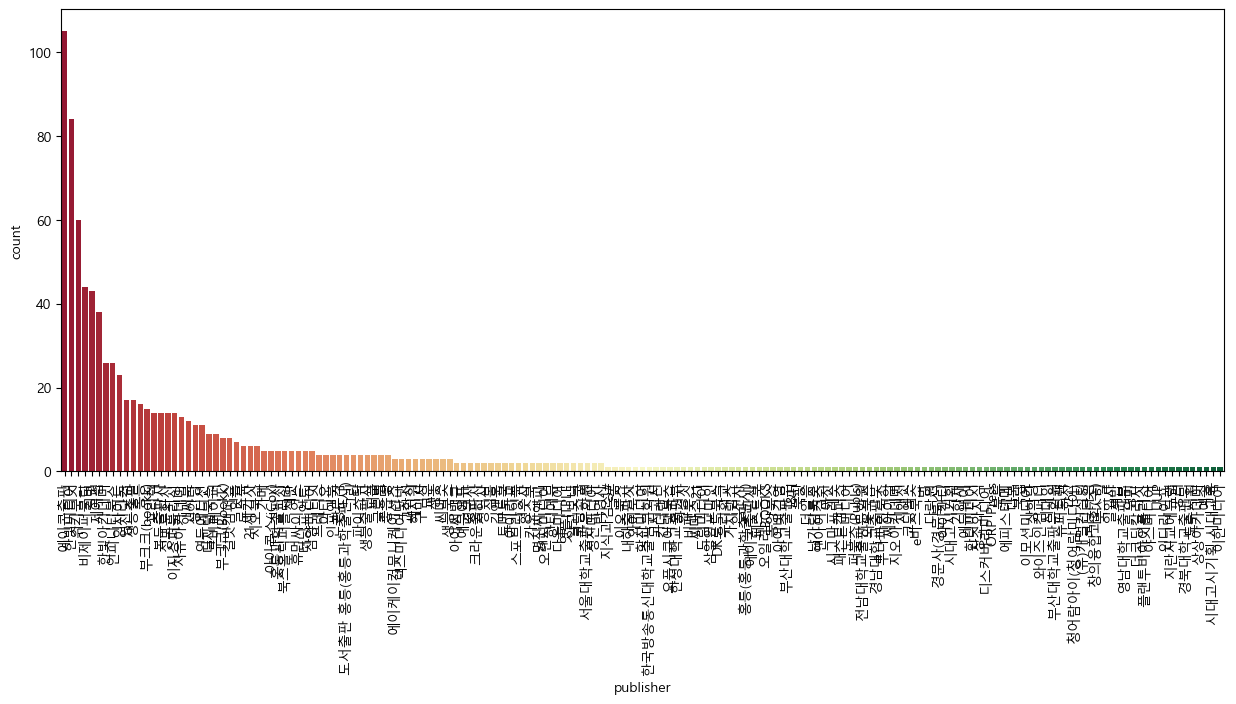

In [37]:
# 출판사별 분포
plt.figure(figsize=(15, 6))
sns.countplot(x = 'publisher' , data = raw_data, palette = "RdYlGn", 
              order = raw_data['publisher'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()


특정 출판사들의 정보가 많은 것 같다.

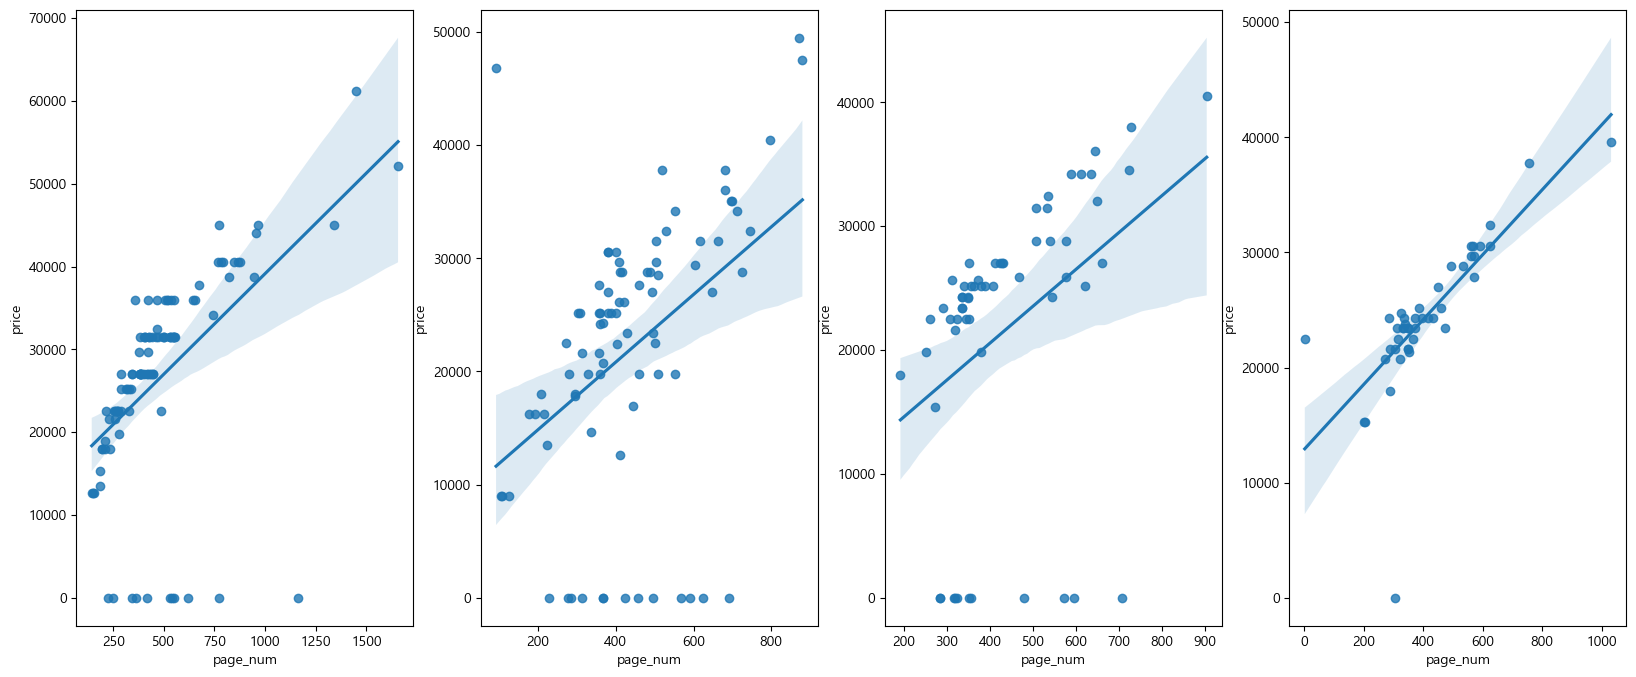

In [41]:
import seaborn as sns

# 출판사별 가격 회귀 시각화 함수
def show_regplot_pub(publisher, ax):
    raw_1 = raw_data[raw_data['publisher'] == publisher]
    sns.regplot(x='page_num', y='price', data=raw_1, ax=ax)

fig, ax = plt.subplots(1, 4, figsize=(20, 8))

show_regplot_pub('에이콘출판', ax[0])
show_regplot_pub('한빛미디어', ax[1])
show_regplot_pub('위키북스', ax[2])
show_regplot_pub('비제이퍼블릭', ax[3])

plt.show()

출판사별 페이지 개수에 따른 가격을 예측하는 것도 나쁘지 않아보인다.

boxplot

In [42]:
import plotly.express as px

px.box(raw_data, y = 'price')

In [56]:
# 데이터 분리(페이지 정보 - 가격 회귀 예측)

from sklearn.model_selection import train_test_split

X = raw_data['page_num'].values
y = raw_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [57]:
# 모델 학습
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
# 에러 계산
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  9265.243542372275
RMSE of Test Data :  7447.320295153908


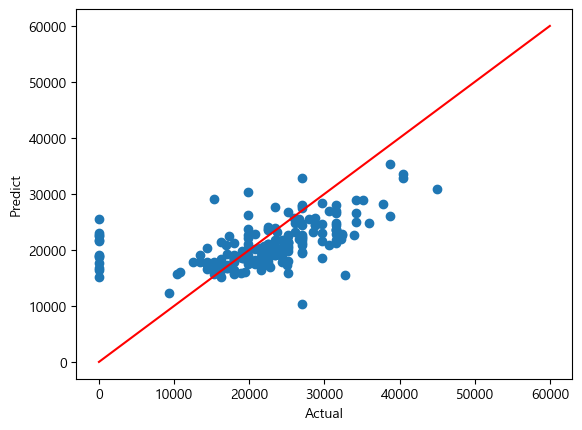

In [64]:
# 실제값과 예측값의 차이 시각화
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,60000],[0,60000], 'r')
plt.show()

실제값보다 싸게 예측한 것이 많아보인다.

이번에는 출판사별 가격 예측을 해보자.

앞서 시각화된 출판사 중 회귀로 잘 표현된 "비제이퍼블릭" 출판사의 가격을 예측해보자.

In [68]:
raw_1 = raw_data[raw_data['publisher'] == "비제이퍼블릭"]

X = raw_1['page_num'].values
y = raw_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [69]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  2203.4514471499165
RMSE of Test Data :  7685.712498848275


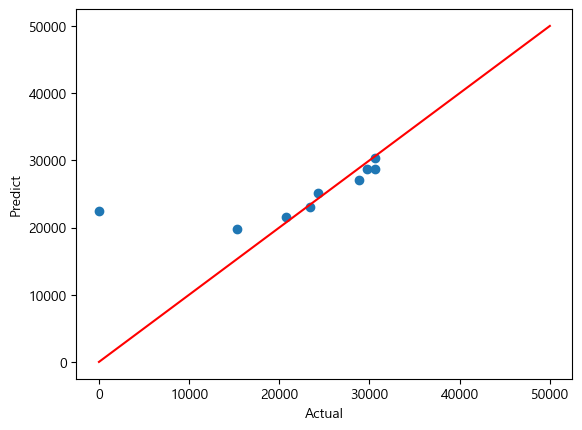

In [71]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,50000],[0,50000], 'r')
plt.show()

데이터의 수가 적어서 성능이 좋아보인 걸수도 있지만 일단 출판사별로 예측해보는 것이 더 좋아보이긴 한다!

## 클러스터링

문장의 유사도, PCA 등 우리는 앞서 비지도 학습을 배웠다. 비지도 학습의 다른 모델 중 하나가 클러스터링이다.

클러스터링이란, 군집으로 비슷한 샘플들의 모임이라 생각하면 된다.

클러스터링 중 가장 일반적인 알고리즘은 K-Means이다. 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화이다. 거리 기반 알고리즘이라 속성의 개수가 많을 경우 계산량도 커지고 정확도가 많이 떨어지는 단점이 있다.

### iris

In [72]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
# 불편했던 (cm)을 없애주자.

cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [74]:
# 데이터 정리
iris_df = pd.DataFrame(data = iris.data, columns = cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


우리는 여러 번의 실습을 통해 petal 특성들이 유의미하다는 것을 안다.

편의상 두 개의 특성만 추출하여 군집화를 해보자.

In [75]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [76]:
# 군집화
model = KMeans(n_clusters = 3) # 몇 개로 군집화 할건지는 우리가 정해줘야함
# 아래와 같은 옵션들이 더 있다.
# init : 초기 군집 중심점의 좌표를 설정하는 방식
# max_iter : 최대 반복횟수, 모든 데이터의 중심점 이동이 없으면 종료
model.fit(feature)

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3)

In [77]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

지금 이것들은 비지도학습이기 때문에 우리가 익히 알고있는 iris의 라벨 순서가 아니다. 'labels_'에 출력되는 것은 군집화된 특성 라벨인 것임에 주의하자.

In [78]:
# 군집 중심값
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [79]:
# 시각화를 위한 데이터 정리
predict = pd.DataFrame(model.predict(feature), columns = ['cluster'])
feature = pd.concat([feature, predict], axis = 1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


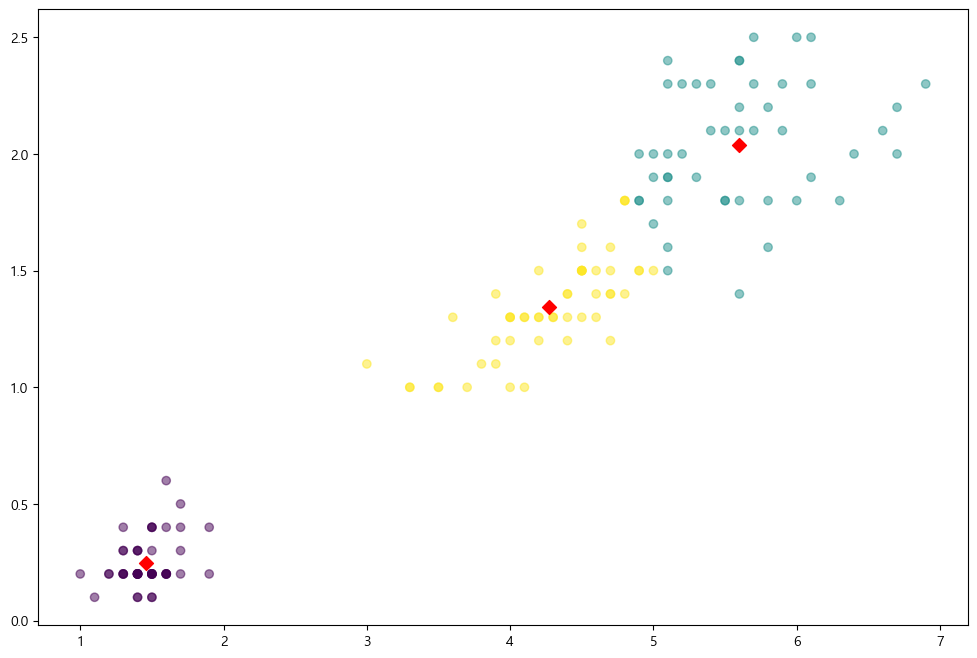

In [80]:
centers = pd.DataFrame(model.cluster_centers_, columns = ['petal length', 'petal width'])

centers_x = centers['petal length']
centers_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'], c = feature['cluster'], alpha = 0.5)
plt.scatter(centers_x, centers_y , s = 50, marker = "D", c = 'r')
plt.show()

### make_blobs 

클러스터링을 공부하기 좋은 데이터를 또 실습해보자.

In [81]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples= 200, # 200개의 데이터
                  n_features=2,   # 2개의 피쳐
                  centers = 3,    # 3개의 중심값
                  cluster_std=0.8,# 데이터들의 표준편차
                  random_state=0
                  )
print(X.shape, y.shape)

# y의 값들과 각 값들의 개수 출력
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [82]:
# 데이터 정리
cluster_df = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [83]:
# 군집화
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [85]:
np.unique(cluster_labels)

array([0, 1, 2])

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



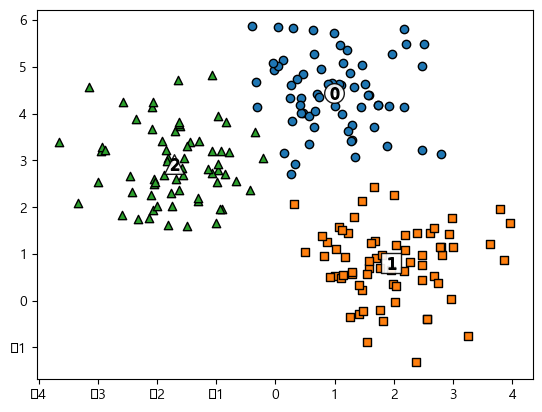

In [84]:
# 결과 시각화
centers = kmeans.cluster_centers_ # 군집 중심값
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', "D", 'H', 'x'] # 마커 모양

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    # 실제값 표시 및 군집화된 컬러 표시
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'],
                edgecolors='k', marker = markers[label])
    
    # 중심값
    # 배경 설정
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white',
                alpha = 0.9, edgecolor = 'k', marker=markers[label])
    # 글씨 설정
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, 
                color = 'k', edgecolor = 'k', marker = '$%d$' % label)
    
plt.show()

In [86]:
# 결과 확인
cluster_df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64

1은 모두 1이라 맞추었고 0과 2에서 잘못 예측한 것이 1개씩 있다.


### 클러스터링 평가

지도학습은 정확도, recall 등 모델을 평가할 수 있는 기준이 있었는데 비지도학습 모델은 어떻게 평가해야할까?

비지도 학습을 평가하기 위해 <실루엣 분석>을 많이 활용한다.
실루엣 분석이란 각 군집 간의 거리가 얼마나 효율적으로 분리되어있는지를 나타내는 것으로 다른 군집과는 거리가 떨어져있고 동일 군집 간의 데이터는 서로 가깝게 잘 뭉쳐져있는지를 확인할 수 있다.

In [92]:
# iris data
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3 ,init = 'k-means++', max_iter=300, random_state=0).fit(iris_df)

# 군집 결과 정리
iris_df['cluster'] = kmeans.labels_


avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print("avg_value = ", avg_value)
print("silhouette_samples() return 값의 shape ", score_values.shape)

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



avg_value =  0.5528190123564095
silhouette_samples() return 값의 shape  (150,)


In [88]:
pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 262.6 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/282.6 kB 217.9 kB/s eta 0:00:02
     -------- ---------------------------- 61.4/282.6 kB 252.2 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/282.6 kB 252.2 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/282.6 kB 255.1 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/282.6 kB 255.1 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/282.6 kB 255.1 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 201.8 kB/s eta 0:

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



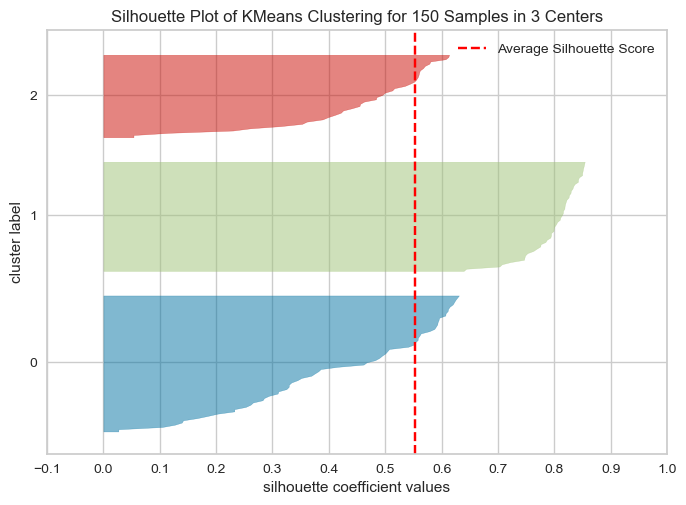

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

In [93]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, iris.data, colors = 'yellowbrick')

대체로 잘 군집화된 것 같다!


### 이미지 분할

이미지 분할은 이미지를 여러 개로 분할하는 것이다. 지금은 단순히 색상 분할을 목적으로 시도해보자.

In [103]:
# 이미지 읽기
from matplotlib.image import imread

image = imread('./data/image.jpg')
image.shape

(621, 621, 3)

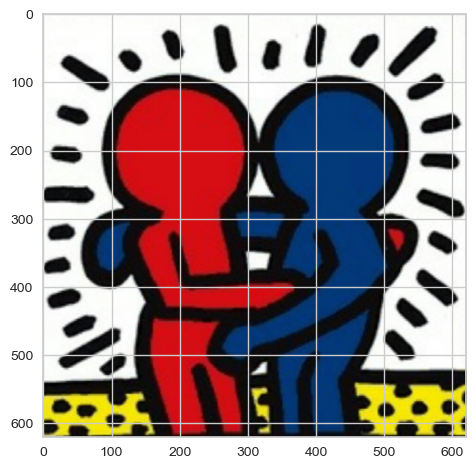

In [104]:
plt.imshow(image)

In [105]:
image.reshape(-1,3)

array([[244, 252, 241],
       [245, 253, 242],
       [246, 254, 243],
       ...,
       [ 11,   7,   4],
       [ 12,   8,   7],
       [  9,   7,   8]], dtype=uint8)

In [108]:
# 색상별 클러스터링
from sklearn.cluster import KMeans

X = image.reshape(-1,3)
# 8개로 구분
kmeans = KMeans(n_clusters=8, random_state=13).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].astype(int) # 대표 색상 8개를 추출
segmented_img = segmented_img.reshape(image.shape)

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



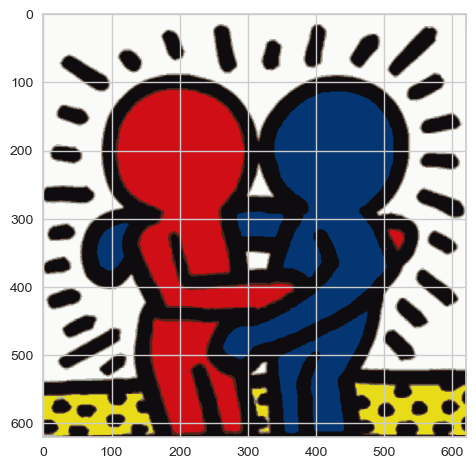

In [109]:
plt.imshow(segmented_img)

In [110]:
# 좀 더 여러가지 군집화를 진행
segmented_imgs = []
n_colors = [10,8,6,4,2]
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].astype(int) 
    segmented_imgs.append(segmented_img.reshape(image.shape))

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\skl

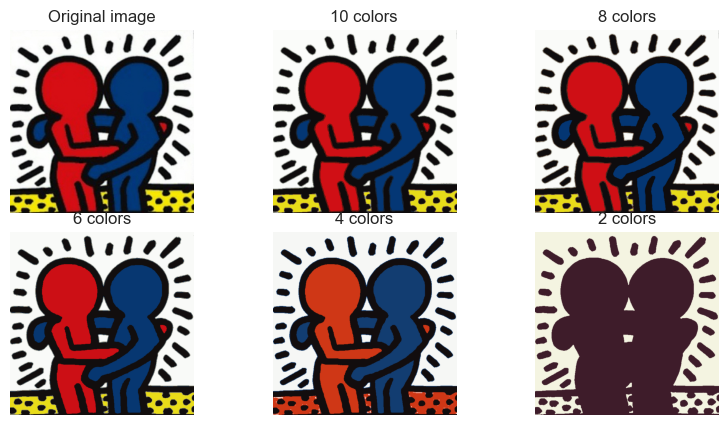

In [112]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05,hspace = 0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### MNIST

In [113]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=13)

In [114]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver = 'lbfgs', max_iter = 5000, random_state=13)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9622222222222222

그냥 다중 분류의 Logistic Regression을 돌려도 꽤 좋은 성능을 보여준다.

한번 kmean도 해보자.

In [115]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans" , KMeans(n_clusters=50, random_state=13)),
    ('log_reg', LogisticRegression(multi_class='ovr', 
                                   solver = 'lbfgs', 
                                   max_iter = 5000, random_state=13))
])
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



0.9688888888888889

성능이 약간 더 상승했다!

이번엔 gridsearch도 해보자

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

grid_clf.best_params_, grid_clf.score(X_test, y_test)